In [1]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

---
#The Gradient Descent Algorithm
---

---
##A more complicated example - adding the y-intercept
---

In [2]:
#This code creates an artificial dataset of 100 points
m = 100

#Generate m points between 1000 and 3000 as input features x
x=np.array(np.linspace(1000,3000,m))

#Generate a little noise to add to x
z = np.random.rand(m)*100

#Now generate y - a straight line with added noise. The slope is 0.6 and the y intercept is 50
y_intercept = 50
slope = 0.6
y = [y * slope + y_intercept for y in x] + z

---
#Before using gradient descent on real data
---
##we must scale the inputs, otherwise known as *Feature Scaling*
---
###Examples of Feature Scaling:
###1 - subtract the mean divide by the range
###2 - subtract the mean divide by the standard deviation
###3 - ...
---

In [3]:
#Subtract the mean and divide by the standard deviation
x_scaled = (x - x.mean())/x.std()
mean_for_scaling = x.mean()
std_for_scaling = x.std()

#Plot the data

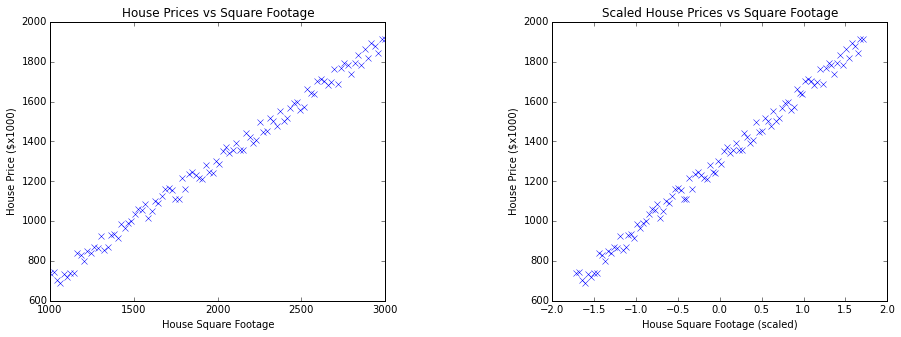

In [4]:
theta1 = 1

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,y, 'x')
ax1.set_xlabel("House Square Footage")
ax1.set_ylabel("House Price ($x1000)")
ax1.set_title("House Prices vs Square Footage")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x_scaled,y, 'x')
ax2.set_xlabel("House Square Footage (scaled)")
ax2.set_ylabel("House Price ($x1000)")
ax2.set_title("Scaled House Prices vs Square Footage")
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

###Define the Hypothesis function - $h(x)$

In [5]:
def h(x, theta0, theta1):
    return theta0 + x * theta1

###Define a cost function - $J(\theta_{0}, \theta_{1})$

In [6]:
def J(theta0, theta1, h, x, y):
    yhat = h(x, theta0, theta1).reshape(1, len(x))
    y = y.reshape(1, len(x))
    sum_diff = (y - yhat) * (y - yhat)
    return (1.0/(2.0*len(x))) * sum_diff.sum()

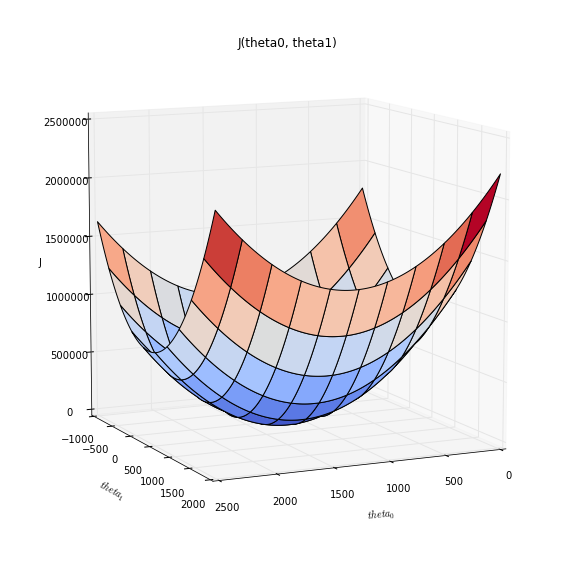

In [7]:
fig = plt.figure(figsize=(10,10))

ax2 = fig.add_subplot(111, projection='3d')
ax2.elev=10
ax2.azim=65
ax2.set_title('J(theta0, theta1)')
ax2.set_xlabel("$theta_{0}$")
ax2.set_ylabel("$theta_{1}$")
ax2.set_zlabel("J")

thet0 = np.linspace(0, 2500, m)
thet1 = np.linspace(-1000, 2000, m)
t0, t1 = np.meshgrid(thet0, thet1)

Z=[]
for i in xrange(m):
    for j in xrange(m):
        Z.append(J(t0[i][j], t1[i][j], h, x_scaled, y))
Z=np.array(Z)
Z=Z.reshape(m, m)

ax2.plot_surface(t0, t1, Z, cmap=cm.coolwarm)

#The Gradient Descent Algorithm

----
##We know the cost function $J(\theta_{0}, \theta_{2})$
##We want to know the values of $\theta_{0}$ and $\theta_{1}$ that minimize $J(\theta_{0}, \theta_{2})$
----

---
##Step 1: Set $\theta_{0}$ and $\theta_{1}$ to random initial values
---
##Step 2: Change $\theta_{0}$ and $\theta_{1}$ to reduce $J(\theta_{0}, \theta_{2})$ until you get to a minimum
---

---
##The details of the update equations are beyond the scope of the course
##Just believe that you can update the values of $\theta_{0}$ and $\theta_{1}$
####The solution involves partial derivatives of the cost function...
---

---
##The algorithm leaves you with a *hyper-parameter* that you will need to set
##The hyper-parameter associated with gradient descent is called the *learning rate*
---
##The learning rate determines the step-size taken when you change $\theta_{0}$ and $\theta_{1}$
##Too large a learning rate and you may over-shoot, too small and it may take a long time
---
##The art of data science!

In [8]:
#These are the update equations. they calculate the partial derivatives of the cost function
#with respect to each of the thetas
def theta0_update(alpha, theta0, theta1, h, x, y):
    h1 = h(x, theta0, theta1).reshape(1,len(x))
    y1 = y.reshape(1,len(x))
    diff = h1 - y1
    return (alpha/len(x))*diff.sum()

def theta1_update(alpha, theta0, theta1, h, x, y):
    h1 = h(x, theta0, theta1).reshape(1,len(x))
    y1 = y.reshape(1,len(x))
    x1 = x.reshape(1,len(x))
    diff = (h1 - y1)*x1
    return (alpha/len(x))*diff.sum()

Slope is  -500 Y intercept is 2000


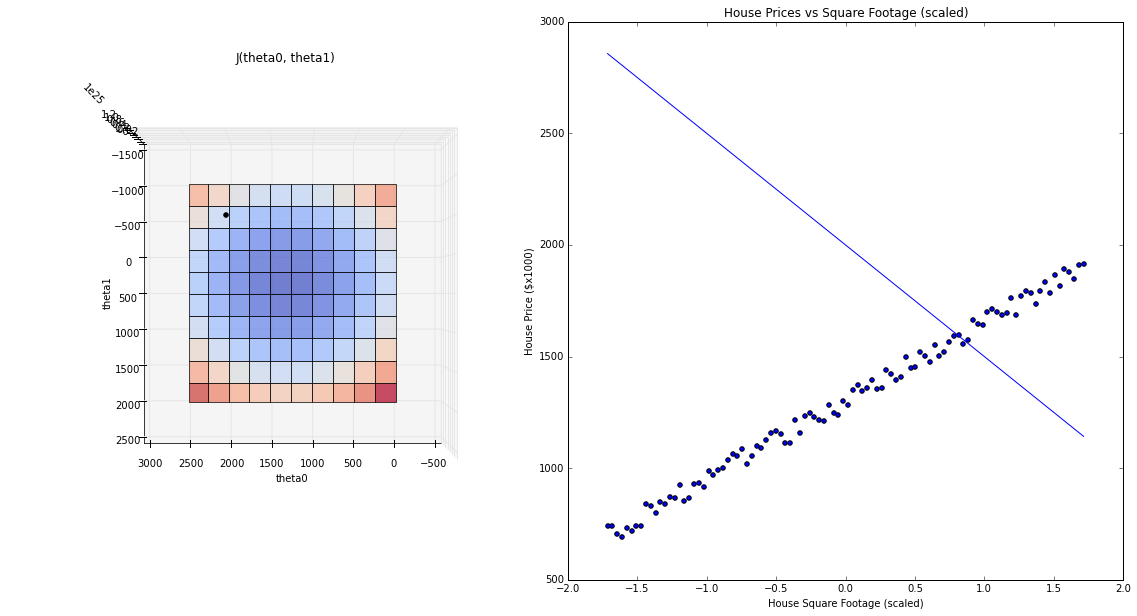

>>>
Slope is  -458.262870158 Y intercept is 1965.86495781


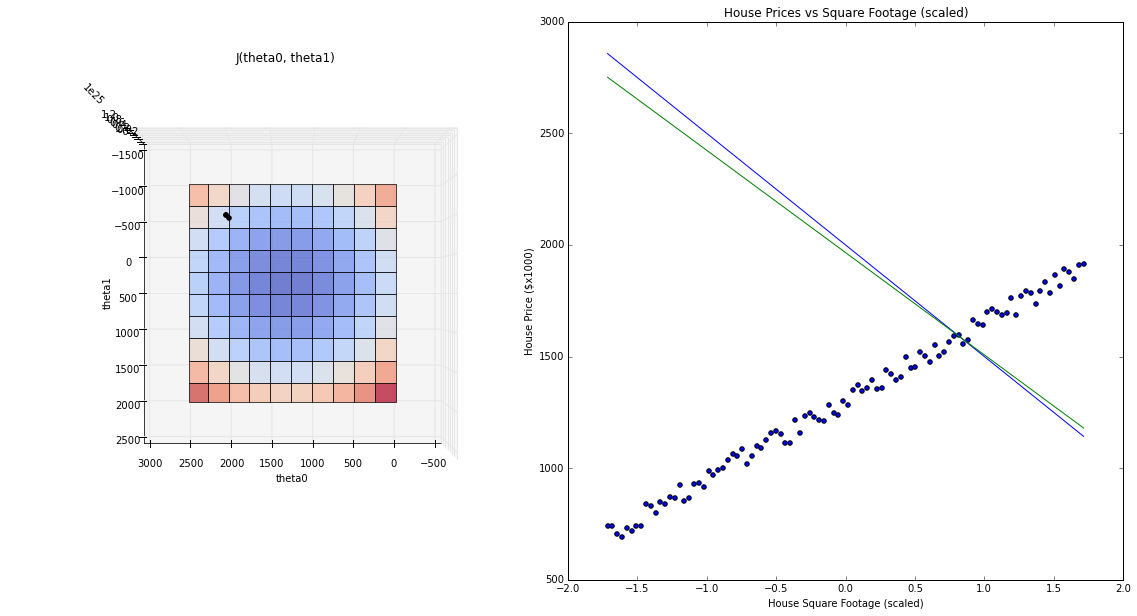

>>>
Slope is  -310.791507602 Y intercept is 1845.25433599


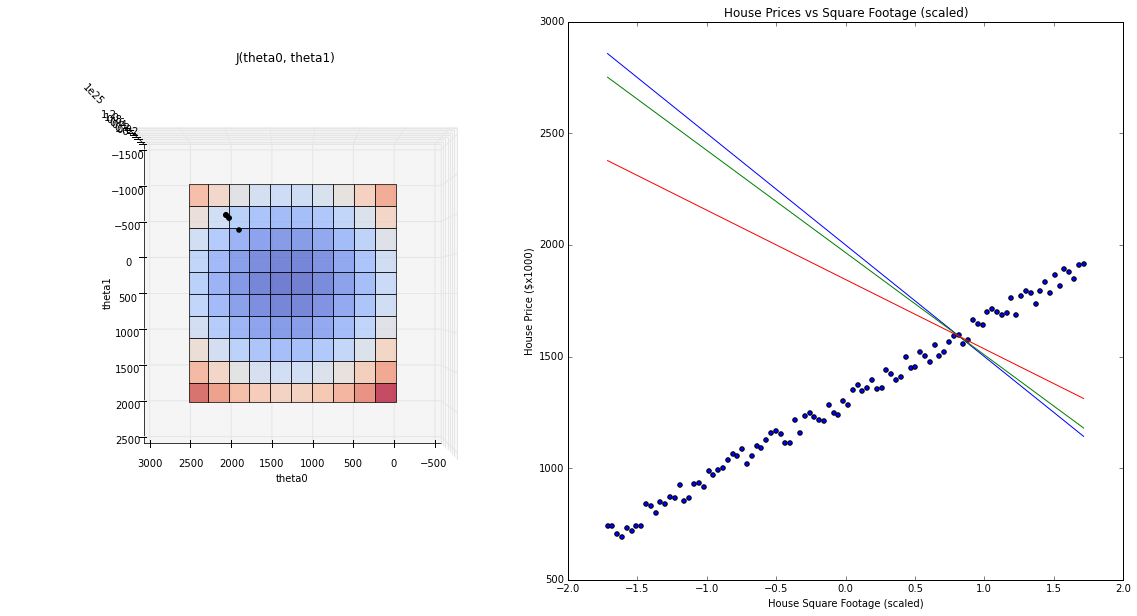

>>>
Slope is  -163.621100836 Y intercept is 1724.88985324


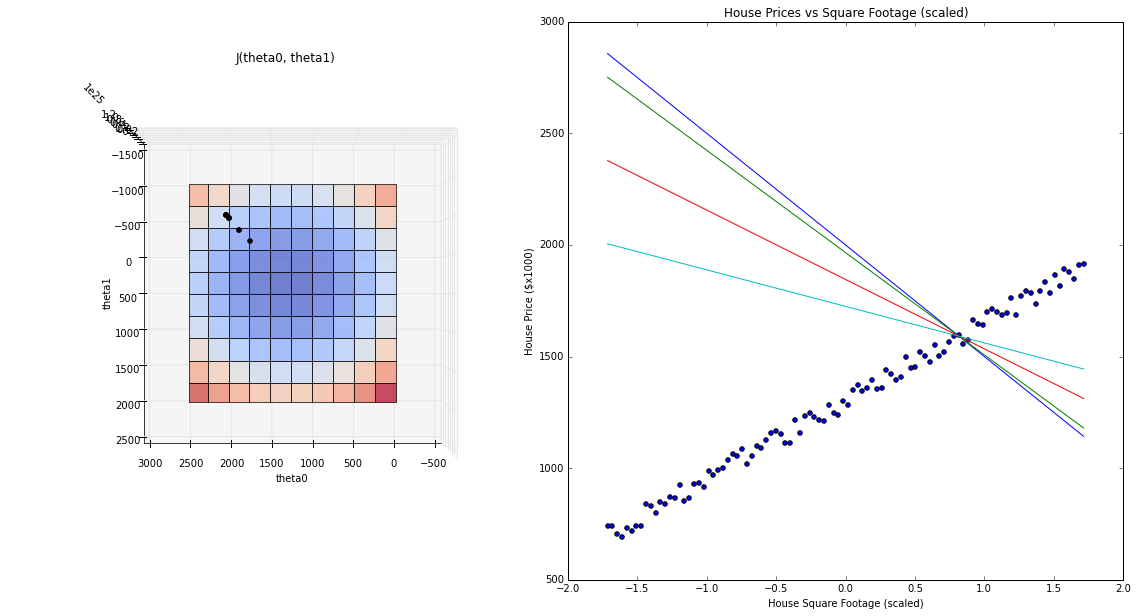

>>>
Slope is  39.890174016 Y intercept is 1558.44654532


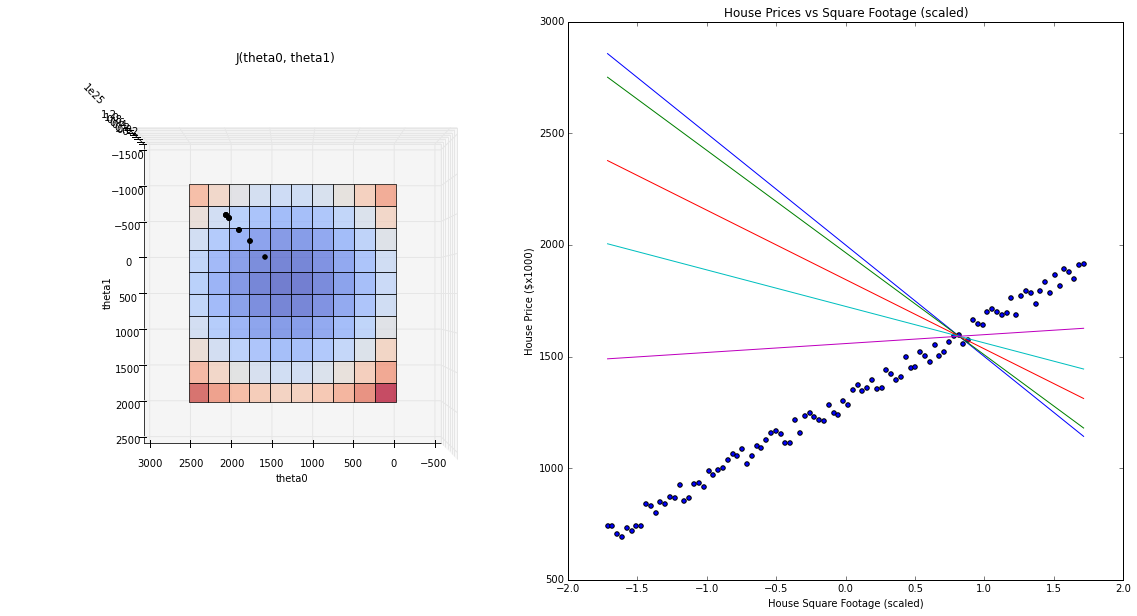

>>>
Slope is  282.575373981 Y intercept is 1359.96453249


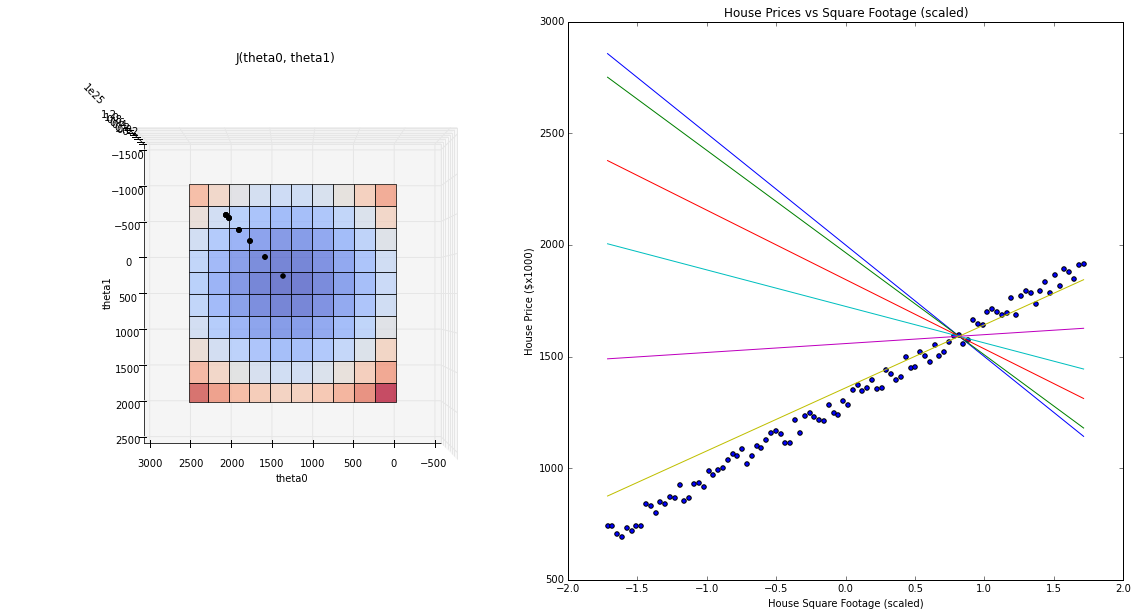

>>>
Slope is  346.009772581 Y intercept is 1308.08420721


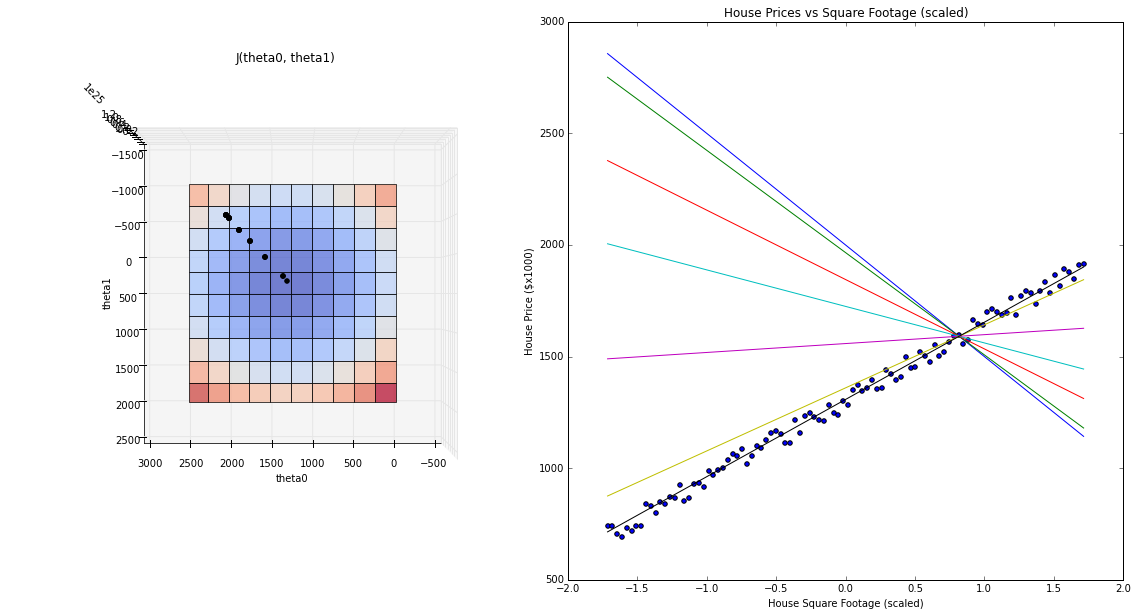

>>>
Slope is  351.568465445 Y intercept is 1303.53798622


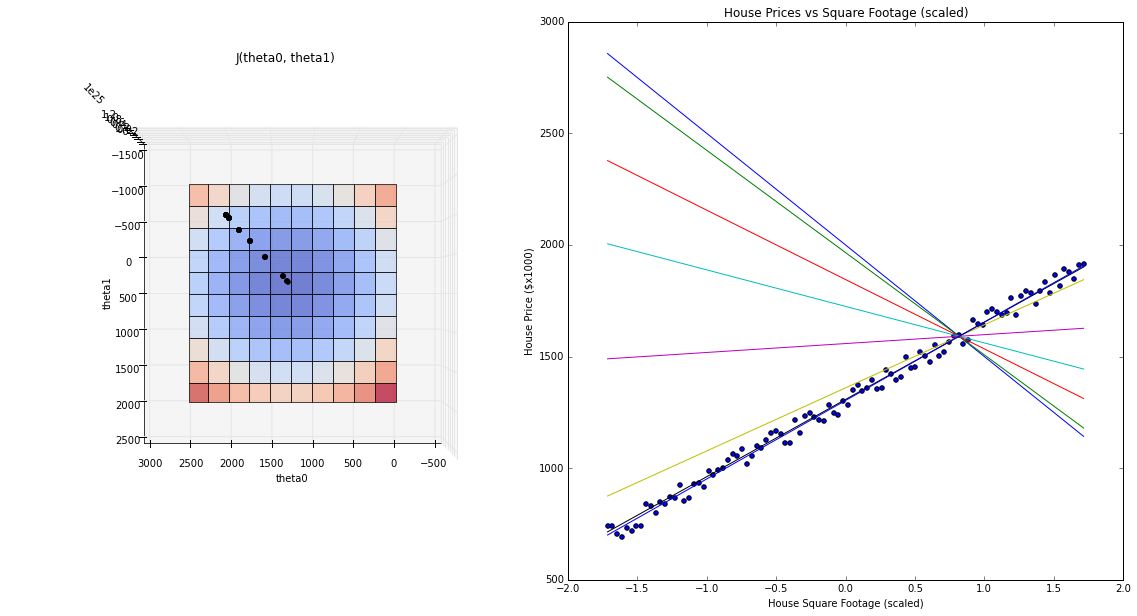

>>>


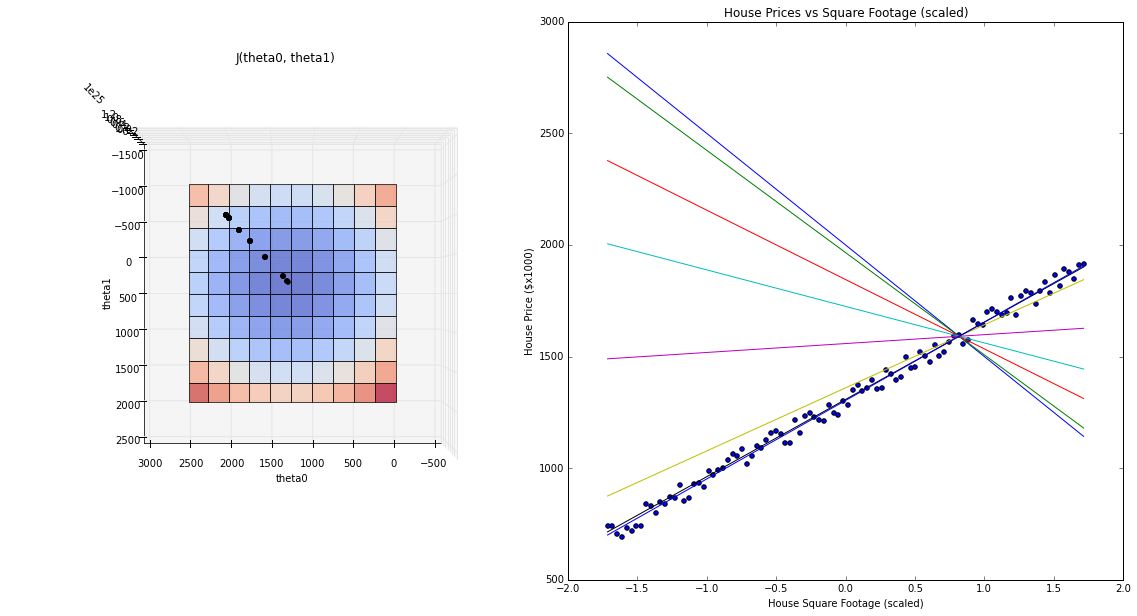

In [9]:
theta_list = []
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.01, hspace=0.01)

#make a 2d plot of the points
ax = fig.add_subplot(1,2,2)
ax.scatter(x_scaled, y)
ax.set_xlabel("House Square Footage (scaled)")
ax.set_ylabel("House Price ($x1000)")
ax.set_title("House Prices vs Square Footage (scaled)")

#make a 3d plot of the bowl
ax2 = fig.add_subplot(1,2,1, projection='3d')
ax2.elev=90
ax2.azim=90
ax2.set_title('J(theta0, theta1)')
ax2.set_xlabel("theta0")
ax2.set_ylabel("theta1")

thet0 = np.linspace(0, 2500, m)
thet1 = np.linspace(-1000, 2000, m)
t0, t1 = np.meshgrid(thet0, thet1)
Z=[]
for i in xrange(m):
    for j in xrange(m):
        Z.append(J(t0[i][j], t1[i][j], h, x_scaled, y))
Z=np.array(Z)
Z=Z.reshape(m, m)
ax2.plot_surface(t0, t1, Z, cmap=cm.coolwarm, alpha=0.7)

#------------------------

for no_of_iterations in (0, 5, 25, 50, 100, 250, 500, 1000):
    
    #Here is step 1, initialing theta0 and theta1
    theta0 = 2000
    theta1 = -500
    
    #Here is the learning rate. Try changing this to 0.1 - what happens? 0.001 - what happens?
    alpha = 0.01
    
    #Find the values of theta after no_of_iterations of gradient descent
    for i in xrange(no_of_iterations): 
        temp0 = theta0 - theta0_update(alpha, theta0, theta1, h, x_scaled, y)
        temp1 = theta1 - theta1_update(alpha, theta0, theta1, h, x_scaled, y)
        theta0 = temp0
        theta1 = temp1
    theta_list.append((theta0,theta1))
        
    #draw the line on the 2d plot
    ax.plot(x_scaled, h(x_scaled, theta0, theta1))
    
    #plot the values of theta0 and theta1 on the 3d plot
    for th0, th1 in theta_list:
        ax2.scatter(th0, th1, zs=1e25, c='k', depthshade=False)
    
    print "Slope is ", theta1, "Y intercept is", theta0
    
    #display.clear_output(wait=True)
    display.display(plt.gcf())
    raw_input(">>>")
